In [ ]:
pip install nbconvert


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
df = pd.read_csv('/Users/lyw/baseline/train/train.csv')#,index=False)
df

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,out,0,2,2,0,2,0,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,out,0,0,0,3,0,3,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,out,0,4,4,4,4,5,4,4,5,...,5,5,6,5,6,6,6,5,6,4
3,out,0,6,5,5,6,5,6,6,5,...,6,6,7,7,5,6,5,5,7,7
4,out,0,3,0,0,3,0,0,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,noise,0,5,6,6,23,15,7,10,15,...,8,7,7,7,7,7,6,7,6,7
33596,noise,0,3,3,3,2,3,3,3,3,...,3,5,5,5,5,3,3,3,3,3
33597,noise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,0,0,3
33598,noise,0,8,7,7,5,8,8,8,8,...,8,10,8,8,10,10,7,7,7,5


In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
#df.loc["a"]
df.iloc[:1]

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,out,0,2,2,0,2,0,2,2,2,...,2,5,2,2,5,2,2,5,2,5


In [6]:
x = df[df.columns[1:514].to_list()]
x

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,0,2,2,0,2,0,2,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,0,0,0,3,0,3,0,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,0,4,4,4,4,5,4,4,5,5,...,5,5,6,5,6,6,6,5,6,4
3,0,6,5,5,6,5,6,6,5,5,...,6,6,7,7,5,6,5,5,7,7
4,0,3,0,0,3,0,0,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,8,7,7,7,7,7,6,7,6,7
33596,0,3,3,3,2,3,3,3,3,7,...,3,5,5,5,5,3,3,3,3,3
33597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,0,0,3
33598,0,8,7,7,5,8,8,8,8,7,...,8,10,8,8,10,10,7,7,7,5


In [14]:
x.loc[0]

0HZ       0
10HZ      2
20HZ      2
30HZ      0
40HZ      2
         ..
5080HZ    2
5090HZ    2
5100HZ    5
5110HZ    2
5120HZ    5
Name: 0, Length: 513, dtype: int64

In [ ]:
df = [df['leaktype']=='out']

In [ ]:
df[0]

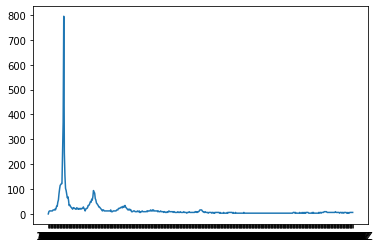

In [22]:
import matplotlib.pyplot as plt
#df = df.astype(int)
#df
plt.plot(x.loc[28610]) #our->out

In [ ]:
# 옥외누수(out), 옥내누수(in), 정상(normal), 전기/기계음(noise), 환경음(other)

df['class']=0
df.loc[df['leaktype'] == 'out','class']=0
df.loc[df['leaktype'] == 'in','class']=1
df.loc[df['leaktype'] == 'normal','class']=2
df.loc[df['leaktype'] == 'noise','class']=3
df.loc[df['leaktype'] == 'other','class']=4
df

In [ ]:
x = df[df.columns[1:514].to_list()]
x

In [ ]:
print(type(x))

In [ ]:
np.eye(5)[3]

In [ ]:
y = df[df.columns[-1:].to_list()]
y

In [ ]:
yy = y['class'].map(lambda x:np.eye(5)[x])

In [ ]:
yy = np.vstack(yy)

In [ ]:
print(type(yy))

In [ ]:
np.shape(yy)

In [ ]:
np.shape(x)

In [ ]:
x.shape

In [ ]:
[x.shape, np.newaxis]

In [ ]:
x = np.expand_dims(x, axis=-1)

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, Activation
#from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



# x = df[df.columns[1:].to_list()]
# y = df[df.columns[-1:].to_list()]

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, yy, test_size=0.2, shuffle=True, stratify=None, random_state=100)


#train, val = train_test_split(df, test_size=0.2, random_state=100)

#print(train.shape[0])

model = tf.keras.models.Sequential()

# model.add(tf.keras.Input(shape=x_train.shape[1:]))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
        
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
model.add(tf.keras.Input(shape=x_train.shape[1:]))
model.add(LSTM(units = 50, return_sequences = True))

model.add(LSTM(units = 50, return_sequences = True))

model.add(LSTM(units=50))

model.add(Dense(units = 5,activation='softmax'))
model.summary()


#print(train)
#print(val)

In [ ]:
filepath="/Users/lyw/baseline/train/weights-improvement-{epoch:02d}.ckpt"#-{val_acc:.2f}
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy']) #'sparse_categorical_crossentropy' categorical_crossentropy
filepaths = '/Users/lyw/baseline/train/best_model6_.h5'
model.load_weights(filepaths)
# early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
history = model.fit(x_train,
                    y_train,
                    batch_size=16,
                    epochs=1,
                    validation_steps=5,
                    validation_data=(x_test, y_test),
                    validation_batch_size=16,
                    verbose=2,
                    callbacks=callbacks_list)

In [ ]:
#from tensorflow.keras.models import save_model #학습 모델 저장

In [ ]:
#save_model(model, 'best_model.h5')

In [ ]:
filepath = '/Users/lyw/baseline/train/best_model6_.h5'
model.load_weights(filepath)# Re-evaluate the model
loss,acc = model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


In [ ]:
print(x_test.shape)

In [ ]:
y_test.shape

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef

#print(x_test)
pred = model.predict(x_test)
# cm = confusion_matrix(y_test,pred)
# df_cm = pd.DataFrame(cm,index=['normal', 'abnormal'],columns=['normal', 'abnormal'])
# df_cm

In [ ]:
pred

In [ ]:
pred_arg = np.argmax(pred, axis=1)

In [ ]:
pred_arg

In [ ]:
true_arg = np.argmax(y_test, axis=1)

In [ ]:
true_arg

In [ ]:
cm = confusion_matrix(true_arg, pred_arg)
print(cm)

In [ ]:
f1_score(true_arg, pred_arg, average='macro')

In [ ]:
accuracy_score(true_arg, pred_arg)

In [ ]:
print('F1_score:{:4.2f}%'.format(f1_score(true_arg, pred_arg, average=None)*100))

In [ ]:
test_df = pd.read_csv('/Users/lyw/baseline/test/test.csv')
test_X = test_df.loc[:,test_df.columns!='id']

#print(test_X)

test_ids = test_df['id']
test_X = np.expand_dims(test_X, axis=-1)

#print(test_X)
#print(type(test_X))
    
model = filepath
#print(f'complete {train_serial} model load')
    
print('Making predictions')
    
sample_df = pd.read_csv('/Users/lyw/baseline/sample_submission.csv')
sorter = list(sample_df['id'])
    
y_pred = model.predict(test_X)
print(type(y_pred))
y_pred_df = pd.DataFrame(y_pred, columns=['leaktype'])
y_pred_df['leaktype'] = y_pred_df['leaktype'].replace(LABEL_DECODING)
pred_df = pd.concat([test_ids, y_pred_df],axis=1)
    
    # sort predictions
resdf = pred_df.set_index('id')
result = resdf.loc[sorter].reset_index()
resultpath = os.path.join('/Users/lyw/baseline/predictions.csv')
result.to_csv(resultpath, index=False)

In [ ]:
import keras.backend as K

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Valdation loss')
plt.legend()
plt.show()  

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_test[0]) # in -> out

In [ ]:
plt.plot(x_test[100])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x[10])

In [ ]:
plt.plot(x[100])